**Data Wrangling**

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('/content/pakwheels.csv')
df = df[df['Car Name'] != 'Car Name']

In [4]:
df.to_csv('pakwheelsupdated.csv', index=False)

In [5]:
df.head()

,Car Name,Car Price,Car Model,Car Mileage,Car Transmission,Car Fuel,Car Registeration,Car Color,Car Assembly,Car Engine Capacity,...,Power Steering,Power Windows,Sun Roof,Car Overall Inspection Score(Out of 10),Car Exterior Body Rating,Car Engine Transmission Clutch rating,Car Suspension Steering Rating,Car Interior Rating,Car AC Rating,Car URL
0,Toyota Aqua 2023,PKR 62 lacs,2023,"43,500 km",Automatic,Hybrid,Sindh,Blue,Imported,1500 cc,...,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,https://www.pakwheels.com/used-cars/toyota-aqu...
1,Toyota Corolla Altis Grande CVT-i 1.8 2016,PKR 42 lacs,2016,"70,464 km",Automatic,Petrol,Karachi,Black,Local,1800 cc,...,Yes,Yes,Yes,7.0,32%,92%,98%,84%,100%,https://www.pakwheels.com/used-cars/toyota-cor...
2,Peugeot 2008 2022,PKR 62 lacs,2022,"51,400 km",Automatic,Petrol,Lahore,Black,Imported,1200 cc,...,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,https://www.pakwheels.com/used-cars/peugeot-20...
3,Honda Civic VTi Prosmatec 1.8 i-VTEC 2012,PKR 25.5 lacs,2012,"136,459 km",Automatic,Petrol,Lahore,Crystal Black,Local,1800 cc,...,Yes,Yes,No,6.9,33%,90%,92%,91%,100%,https://www.pakwheels.com/used-cars/honda-civi...
5,Toyota Fortuner 2.8 Sigma 4 2019,PKR 1.4 crore,2019,"55,000 km",Automatic,Diesel,Lahore,Attitude Black,Local,2800 cc,...,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,https://www.pakwheels.com/used-cars/toyota-for...


In [6]:
df.count()

Car Name                                   1285
Car Price                                  1285
Car Model                                  1285
Car Mileage                                1285
Car Transmission                           1285
Car Fuel                                   1285
Car Registeration                          1285
Car Color                                  1285
Car Assembly                               1285
Car Engine Capacity                        1284
Car Body Type                              1167
Car Location                               1285
ABS                                        1220
AM/FM Radio                                1220
Air Bags                                   1220
Air Conditioning                           1220
Alloy Rims                                 1220
Cruise Control                             1220
Immobilizer Key                            1220
Keyless Entry                              1220
Navigation System                       

In [7]:
df.isnull().sum()

Car Name                                     15
Car Price                                    15
Car Model                                    15
Car Mileage                                  15
Car Transmission                             15
Car Fuel                                     15
Car Registeration                            15
Car Color                                    15
Car Assembly                                 15
Car Engine Capacity                          16
Car Body Type                               133
Car Location                                 15
ABS                                          80
AM/FM Radio                                  80
Air Bags                                     80
Air Conditioning                             80
Alloy Rims                                   80
Cruise Control                               80
Immobilizer Key                              80
Keyless Entry                                80
Navigation System                       

In [8]:
columns_to_drop = ['Car Overall Inspection Score(Out of 10)', 'Car Exterior Body Rating', 'Car Engine Transmission Clutch rating','Car Suspension Steering Rating','Car Interior Rating','Car AC Rating']
df = df.drop(columns=columns_to_drop)

In [9]:
df.isnull().sum()

Car Name                15
Car Price               15
Car Model               15
Car Mileage             15
Car Transmission        15
Car Fuel                15
Car Registeration       15
Car Color               15
Car Assembly            15
Car Engine Capacity     16
Car Body Type          133
Car Location            15
ABS                     80
AM/FM Radio             80
Air Bags                80
Air Conditioning        80
Alloy Rims              80
Cruise Control          80
Immobilizer Key         80
Keyless Entry           80
Navigation System       80
Power Locks             80
Power Mirrors           80
Power Steering          80
Power Windows           80
Sun Roof                80
Car URL                  0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

Car Name               0
Car Price              0
Car Model              0
Car Mileage            0
Car Transmission       0
Car Fuel               0
Car Registeration      0
Car Color              0
Car Assembly           0
Car Engine Capacity    0
Car Body Type          0
Car Location           0
ABS                    0
AM/FM Radio            0
Air Bags               0
Air Conditioning       0
Alloy Rims             0
Cruise Control         0
Immobilizer Key        0
Keyless Entry          0
Navigation System      0
Power Locks            0
Power Mirrors          0
Power Steering         0
Power Windows          0
Sun Roof               0
Car URL                0
dtype: int64

In [12]:
df.count()

Car Name               1137
Car Price              1137
Car Model              1137
Car Mileage            1137
Car Transmission       1137
Car Fuel               1137
Car Registeration      1137
Car Color              1137
Car Assembly           1137
Car Engine Capacity    1137
Car Body Type          1137
Car Location           1137
ABS                    1137
AM/FM Radio            1137
Air Bags               1137
Air Conditioning       1137
Alloy Rims             1137
Cruise Control         1137
Immobilizer Key        1137
Keyless Entry          1137
Navigation System      1137
Power Locks            1137
Power Mirrors          1137
Power Steering         1137
Power Windows          1137
Sun Roof               1137
Car URL                1137
dtype: int64

In [13]:
df['Car Price'] = df['Car Price'].replace({'PKR': '', 'crore': '', 'Call for price': ''}, regex=True)
df['Car Price'] = df['Car Price'].apply(lambda x: pd.to_numeric(x.split()[0], errors='coerce') * 100000 if 'lacs' in x else pd.to_numeric(x, errors='coerce') * 10000000)
df['Car Price'] = df['Car Price'].astype('Int64', errors='ignore')

<ipython-input-13-79b6688be29a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car Price'] = df['Car Price'].replace({'PKR': '', 'crore': '', 'Call for price': ''}, regex=True)
<ipython-input-13-79b6688be29a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car Price'] = df['Car Price'].apply(lambda x: pd.to_numeric(x.split()[0], errors='coerce') * 100000 if 'lacs' in x else pd.to_numeric(x, errors='coerce') * 10000000)
<ipython-input-13-79b6688be29a>:3: SettingWithCopyWarning: 
A value is trying 

In [14]:
df['Car Price'].head()

1     4200000.0
3     2550000.0
5    14000000.0
6    15600000.0
7     7600000.0
Name: Car Price, dtype: float64

In [15]:
df.head()

,Car Name,Car Price,Car Model,Car Mileage,Car Transmission,Car Fuel,Car Registeration,Car Color,Car Assembly,Car Engine Capacity,...,Cruise Control,Immobilizer Key,Keyless Entry,Navigation System,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,Car URL
1,Toyota Corolla Altis Grande CVT-i 1.8 2016,4200000.0,2016,"70,464 km",Automatic,Petrol,Karachi,Black,Local,1800 cc,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,https://www.pakwheels.com/used-cars/toyota-cor...
3,Honda Civic VTi Prosmatec 1.8 i-VTEC 2012,2550000.0,2012,"136,459 km",Automatic,Petrol,Lahore,Crystal Black,Local,1800 cc,...,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,https://www.pakwheels.com/used-cars/honda-civi...
5,Toyota Fortuner 2.8 Sigma 4 2019,14000000.0,2019,"55,000 km",Automatic,Diesel,Lahore,Attitude Black,Local,2800 cc,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,https://www.pakwheels.com/used-cars/toyota-for...
6,Toyota Prado TX L Package 2.7 2010,15600000.0,2010,"65,000 km",Automatic,Petrol,Lahore,White,Imported,2700 cc,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,https://www.pakwheels.com/used-cars/toyota-pra...
7,Honda Vezel Hybrid Z 2018,7600000.0,2018,"26,000 km",Automatic,Hybrid,Un-Registered,Blue,Imported,1500 cc,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,https://www.pakwheels.com/used-cars/honda-veze...


In [16]:
total_instances = df.shape[0]
print(f'Total number of instances: {total_instances}')

Total number of instances: 1137


In [17]:
df=df.dropna()

In [18]:
df['Car Price'] = df['Car Price'].astype(int)

In [19]:
df['Car Price'].head()

1     4200000
3     2550000
5    14000000
6    15600000
7     7600000
Name: Car Price, dtype: int64

In [20]:
column_data_type = df['Car Price'].dtype
print(f'Data type of the "Car Price" column: {column_data_type}')

Data type of the "Car Price" column: int64


In [21]:
df['Car Mileage'] = df['Car Mileage'].replace({'km': '', ',': ''}, regex=True).astype(int)


In [22]:
df['Car Engine Capacity'] = df['Car Engine Capacity'].str.replace(' cc', '').astype(int)

In [23]:
df.head()

,Car Name,Car Price,Car Model,Car Mileage,Car Transmission,Car Fuel,Car Registeration,Car Color,Car Assembly,Car Engine Capacity,...,Cruise Control,Immobilizer Key,Keyless Entry,Navigation System,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,Car URL
1,Toyota Corolla Altis Grande CVT-i 1.8 2016,4200000,2016,70464,Automatic,Petrol,Karachi,Black,Local,1800,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,https://www.pakwheels.com/used-cars/toyota-cor...
3,Honda Civic VTi Prosmatec 1.8 i-VTEC 2012,2550000,2012,136459,Automatic,Petrol,Lahore,Crystal Black,Local,1800,...,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,https://www.pakwheels.com/used-cars/honda-civi...
5,Toyota Fortuner 2.8 Sigma 4 2019,14000000,2019,55000,Automatic,Diesel,Lahore,Attitude Black,Local,2800,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,https://www.pakwheels.com/used-cars/toyota-for...
6,Toyota Prado TX L Package 2.7 2010,15600000,2010,65000,Automatic,Petrol,Lahore,White,Imported,2700,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,https://www.pakwheels.com/used-cars/toyota-pra...
7,Honda Vezel Hybrid Z 2018,7600000,2018,26000,Automatic,Hybrid,Un-Registered,Blue,Imported,1500,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,https://www.pakwheels.com/used-cars/honda-veze...


In [24]:
df.to_csv('pakwheelsupdated1.csv', index=False)

**Feature Selection Technique 1**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np




X = df[['Car Model', 'Car Mileage', 'Car Engine Capacity']]
y = df['Car Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def backward_feature_elimination(X_train, X_test, y_train, y_test):
    remaining_features = list(X_train.columns)
    selected_features = list(X_train.columns)
    best_error = np.inf

    while len(remaining_features) > 0:
        current_error = []

        for feature in remaining_features:
            features_to_use = selected_features.copy()
            features_to_use.remove(feature)

            model = LinearRegression()
            model.fit(X_train[features_to_use], y_train)
            predictions = model.predict(X_test[features_to_use])
            error = mean_squared_error(y_test, predictions)
            current_error.append((feature, error))

        current_error = sorted(current_error, key=lambda x: x[1])
        worst_candidate, candidate_error = current_error[-1]

        if candidate_error < best_error:
            selected_features.remove(worst_candidate)
            remaining_features.remove(worst_candidate)
            best_error = candidate_error
        else:
            break

    return selected_features


selected_features_backward = backward_feature_elimination(X_train, X_test, y_train, y_test)


print("Selected Features (Backward Selection):", selected_features_backward)


Selected Features (Backward Selection): ['Car Model', 'Car Mileage']


In [26]:

selected_features_backward_df = df[selected_features_backward + ['Car Price']]


selected_features_backward_df.to_csv('selected_features_backward.csv', index=False)


**Feature Selection Technique 2**

In [27]:
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv('/content/pakwheelsupdated1.csv')


numeric_data = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Car Price'])


threshold = 0.5


selector = VarianceThreshold(threshold=threshold)
selector.fit(numeric_data)


selected_features_idx = selector.get_support(indices=True)


selected_features_variance = data.iloc[:, selected_features_idx]


print(selected_features_variance.head())

selected_features_variance.to_csv('selected_features_variance.csv', index=False)


                                     Car Name  Car Price  Car Model
0  Toyota Corolla Altis Grande CVT-i 1.8 2016    4200000       2016
1   Honda Civic VTi Prosmatec 1.8 i-VTEC 2012    2550000       2012
2            Toyota Fortuner 2.8 Sigma 4 2019   14000000       2019
3          Toyota Prado TX L Package 2.7 2010   15600000       2010
4                   Honda Vezel Hybrid Z 2018    7600000       2018


**Analysis of “Data without any preprocessing technique”**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


df1 = pd.read_csv('/content/pakwheelsupdated1.csv')


Mean Squared Error: 8597749855310.231
R^2 Score: 0.07781145059471639
Predicted price for mileage 20,000: 5114117


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


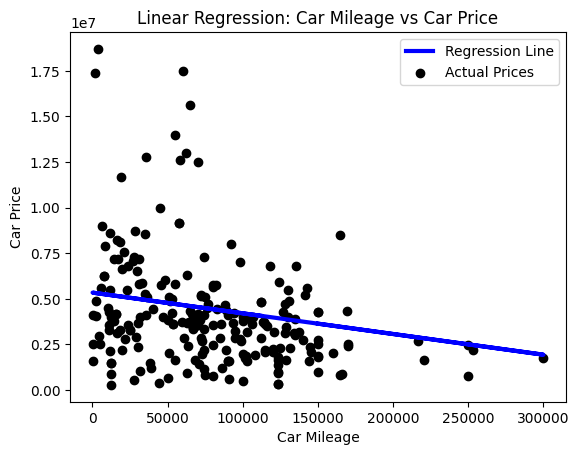

In [29]:
X_raw = df1[['Car Mileage']]
y_raw = df1['Car Price']

df_raw = df1.copy()

df_raw.to_csv('dataset_with_minimalpreprocessing.csv', index=False)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_raw, y_train_raw)

y_pred_raw = model.predict(X_test_raw)

mse = mean_squared_error(y_test_raw, y_pred_raw)
r2 = r2_score(y_test_raw, y_pred_raw)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model.predict([[20000]])
print("Predicted price for mileage 20,000:", int(predicted_price))

plt.plot(X_test_raw, y_pred_raw, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_test_raw, y_test_raw, color='black', label='Actual Prices')
plt.xlabel('Car Mileage')
plt.ylabel('Car Price')
plt.title('Linear Regression: Car Mileage vs Car Price')
plt.legend()
plt.show()


Mean Squared Error: 5702856431279.919
R^2 Score: 0.38831566533882866
Predicted price for Car Engine Capacity 1500 CC: 4894207


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


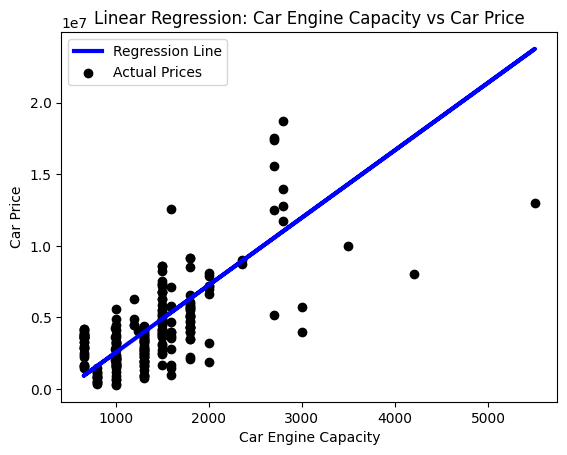

In [30]:
X_raw = df1[['Car Engine Capacity']]
y_raw = df1['Car Price']

#df_raw = df1.copy()

#df_raw.to_csv('dataset_with_minimalpreprocessing.csv', index=False)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_raw, y_train_raw)

y_pred_raw = model.predict(X_test_raw)

mse = mean_squared_error(y_test_raw, y_pred_raw)
r2 = r2_score(y_test_raw, y_pred_raw)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model.predict([[1500]])
print("Predicted price for Car Engine Capacity 1500 CC:", int(predicted_price))

plt.plot(X_test_raw, y_pred_raw, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_test_raw, y_test_raw, color='black', label='Actual Prices')
plt.xlabel('Car Engine Capacity')
plt.ylabel('Car Price')
plt.title('Linear Regression: Car Engine Capacity vs Car Price')
plt.legend()
plt.show()


Mean Squared Error: 4875148372889.042
R^2 Score: 0.4770950444256844
Predicted price for mileage 20,000 and engine capacity 1500: 5796294


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


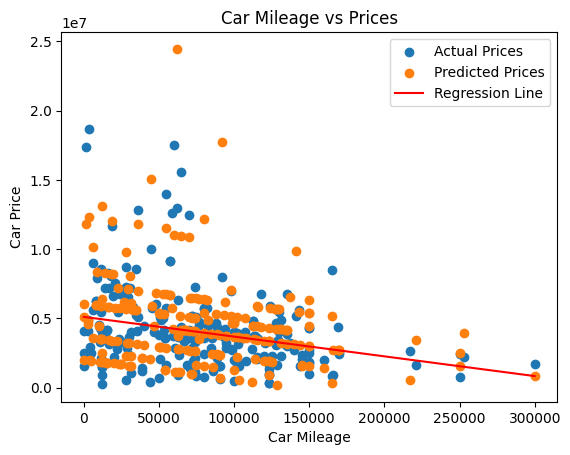

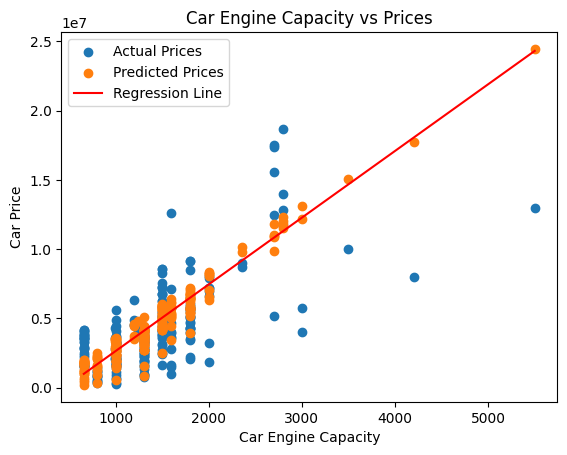

In [31]:

X_raw = df1[['Car Mileage', 'Car Engine Capacity']]
y_raw = df1['Car Price']

#df_raw = df1.copy()


#df_raw.to_csv('dataset_with_minimalpreprocessing.csv', index=False)


X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train_raw, y_train_raw)


y_pred_raw = model.predict(X_test_raw)


mse = mean_squared_error(y_test_raw, y_pred_raw)
r2 = r2_score(y_test_raw, y_pred_raw)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model.predict([[20000, 1500]])
print("Predicted price for mileage 20,000 and engine capacity 1500:",int(predicted_price))


plt.scatter(X_test_raw['Car Mileage'], y_test_raw, label='Actual Prices')
plt.scatter(X_test_raw['Car Mileage'], y_pred_raw, label='Predicted Prices')
plt.xlabel("Car Mileage")
plt.ylabel("Car Price")
plt.title("Car Mileage vs Prices")

mileage_line = np.linspace(X_test_raw['Car Mileage'].min(), X_test_raw['Car Mileage'].max(), 100)
engine_capacity_line = np.median(X_test_raw['Car Engine Capacity'])
price_line = model.coef_[0] * mileage_line + model.coef_[1] * engine_capacity_line + model.intercept_

plt.plot(mileage_line, price_line, color='red', label='Regression Line')

plt.legend()
plt.show()


plt.scatter(X_test_raw['Car Engine Capacity'], y_test_raw, label='Actual Prices')
plt.scatter(X_test_raw['Car Engine Capacity'], y_pred_raw, label='Predicted Prices')
plt.xlabel("Car Engine Capacity")
plt.ylabel("Car Price")
plt.title("Car Engine Capacity vs Prices")


mileage_line = np.median(X_test_raw['Car Mileage'])
engine_capacity_line = np.linspace(X_test_raw['Car Engine Capacity'].min(), X_test_raw['Car Engine Capacity'].max(), 100)
price_line = model.coef_[0] * mileage_line + model.coef_[1] * engine_capacity_line + model.intercept_

plt.plot(engine_capacity_line, price_line, color='red', label='Regression Line')

plt.legend()
plt.show()


**Analysis of “Data with preprocessing technique 1 ”**

Mean Squared Error: 8597749855310.231
R^2 Score: 0.07781145059471639
Predicted price for mileage 20,000: 5114117


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


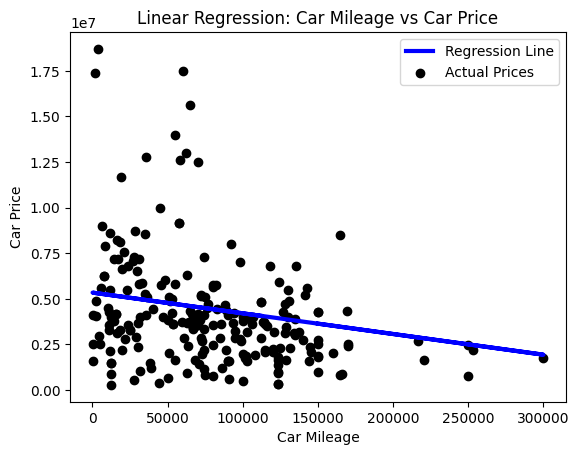

In [32]:
df_preprocessed1 = df1.copy()
df_preprocessed1['Car Mileage'] = df_preprocessed1['Car Mileage'].fillna(df_preprocessed1['Car Mileage'].mean())
df_preprocessed1.to_csv('dataset_with_technique_1.csv', index=False)

X_preprocessed1 = df_preprocessed1[['Car Mileage']]
y_preprocessed1 = df_preprocessed1['Car Price']

X_train_preprocessed1, X_test_preprocessed1, y_train_preprocessed1, y_test_preprocessed1 = train_test_split(
    X_preprocessed1, y_preprocessed1, test_size=0.2, random_state=42)

model_preprocessed1 = LinearRegression()
model_preprocessed1.fit(X_train_preprocessed1, y_train_preprocessed1)
y_pred_preprocessed1 = model_preprocessed1.predict(X_test_preprocessed1)

mse = mean_squared_error(y_test_preprocessed1, y_pred_preprocessed1)
r2 = r2_score(y_test_preprocessed1, y_pred_preprocessed1)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model_preprocessed1.predict([[20000]])
print("Predicted price for mileage 20,000:", int(predicted_price))

plt.plot(X_test_preprocessed1, y_pred_preprocessed1, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_test_preprocessed1, y_test_preprocessed1, color='black', label='Actual Prices')
plt.xlabel('Car Mileage')
plt.ylabel('Car Price')
plt.title('Linear Regression: Car Mileage vs Car Price')
plt.legend()
plt.show()


Mean Squared Error: 5702856431279.919
R^2 Score: 0.38831566533882866
Predicted price for Car Engine Capacity 1500 CC: 4894207


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


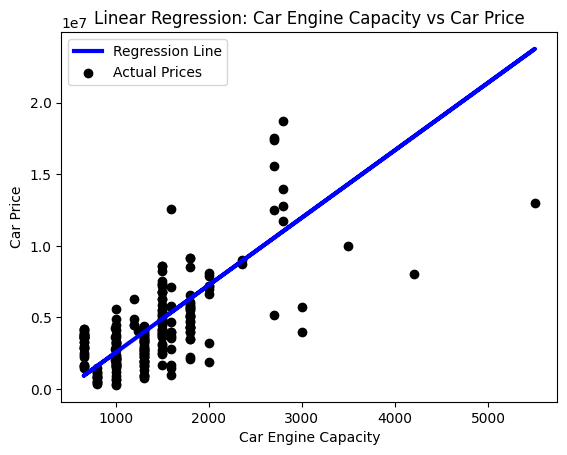

In [33]:
#df_preprocessed1 = df1.copy()
#df_preprocessed1['Car Mileage'] = df_preprocessed1['Car Mileage'].fillna(df_preprocessed1['Car Mileage'].mean())

X_preprocessed1 = df_preprocessed1[['Car Engine Capacity']]
y_preprocessed1 = df_preprocessed1['Car Price']

X_train_preprocessed1, X_test_preprocessed1, y_train_preprocessed1, y_test_preprocessed1 = train_test_split(
    X_preprocessed1, y_preprocessed1, test_size=0.2, random_state=42)

model_preprocessed1 = LinearRegression()
model_preprocessed1.fit(X_train_preprocessed1, y_train_preprocessed1)
y_pred_preprocessed1 = model_preprocessed1.predict(X_test_preprocessed1)

mse = mean_squared_error(y_test_preprocessed1, y_pred_preprocessed1)
r2 = r2_score(y_test_preprocessed1, y_pred_preprocessed1)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model_preprocessed1.predict([[1500]])
print("Predicted price for Car Engine Capacity 1500 CC:", int(predicted_price))

plt.plot(X_test_preprocessed1, y_pred_preprocessed1, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_test_preprocessed1, y_test_preprocessed1, color='black', label='Actual Prices')
plt.xlabel('Car Engine Capacity')
plt.ylabel('Car Price')
plt.title('Linear Regression: Car Engine Capacity vs Car Price')
plt.legend()
plt.show()


Mean Squared Error: 4875148372889.042
R^2 Score: 0.4770950444256844
Predicted price for mileage 20,000 and engine capacity 1500: 5796294


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


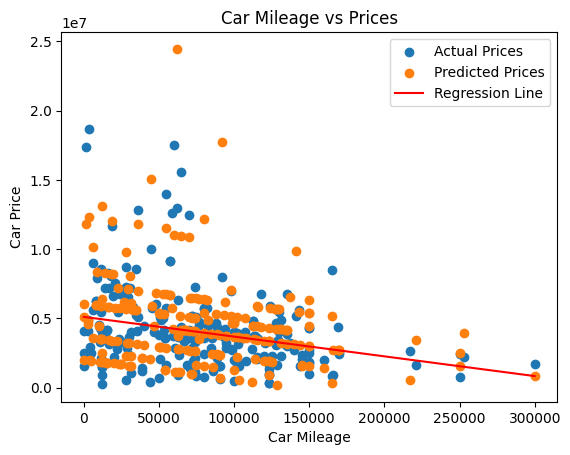

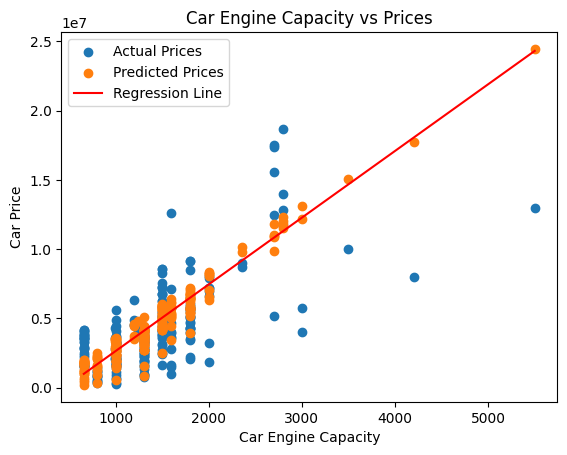

In [34]:
#df_preprocessed1 = df1.copy()
#df_preprocessed1['Car Mileage'] = df_preprocessed1['Car Mileage'].fillna(df_preprocessed1['Car Mileage'].mean())
#df_preprocessed1.to_csv('dataset_with_technique_1.csv', index=False)


X_preprocessed1 = df_preprocessed1[['Car Mileage', 'Car Engine Capacity']]
y_preprocessed1 = df_preprocessed1['Car Price']


X_train_preprocessed1, X_test_preprocessed1, y_train_preprocessed1, y_test_preprocessed1 = train_test_split(
    X_preprocessed1, y_preprocessed1, test_size=0.2, random_state=42)


model_preprocessed1 = LinearRegression()
model_preprocessed1.fit(X_train_preprocessed1, y_train_preprocessed1)
y_pred_preprocessed1 = model_preprocessed1.predict(X_test_preprocessed1)

mse = mean_squared_error(y_test_preprocessed1, y_pred_preprocessed1)
r2 = r2_score(y_test_preprocessed1, y_pred_preprocessed1)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
predicted_price = model.predict([[20000, 1500]])
print("Predicted price for mileage 20,000 and engine capacity 1500:",int(predicted_price))

plt.scatter(X_test_preprocessed1['Car Mileage'], y_test_preprocessed1, label='Actual Prices')
plt.scatter(X_test_preprocessed1['Car Mileage'], y_pred_preprocessed1, label='Predicted Prices')
plt.xlabel("Car Mileage")
plt.ylabel("Car Price")
plt.title("Car Mileage vs Prices")


mileage_line = np.linspace(X_test_preprocessed1['Car Mileage'].min(), X_test_preprocessed1['Car Mileage'].max(), 100)
engine_capacity_line = np.median(X_test_preprocessed1['Car Engine Capacity'])
price_line = model_preprocessed1.coef_[0] * mileage_line + model_preprocessed1.coef_[1] * engine_capacity_line + model_preprocessed1.intercept_

plt.plot(mileage_line, price_line, color='red', label='Regression Line')

plt.legend()
plt.show()

plt.scatter(X_test_preprocessed1['Car Engine Capacity'], y_test_preprocessed1, label='Actual Prices')
plt.scatter(X_test_preprocessed1['Car Engine Capacity'], y_pred_preprocessed1, label='Predicted Prices')
plt.xlabel("Car Engine Capacity")
plt.ylabel("Car Price")
plt.title("Car Engine Capacity vs Prices")


mileage_line = np.median(X_test_preprocessed1['Car Mileage'])
engine_capacity_line = np.linspace(X_test_preprocessed1['Car Engine Capacity'].min(), X_test_preprocessed1['Car Engine Capacity'].max(), 100)
price_line = model_preprocessed1.coef_[0] * mileage_line + model_preprocessed1.coef_[1] * engine_capacity_line + model_preprocessed1.intercept_

plt.plot(engine_capacity_line, price_line, color='red', label='Regression Line')

plt.legend()
plt.show()


**Analysis of “Data with preprocessing technique 2 ”**

Mean Squared Error: 4875148372889.042
R^2 Score: 0.4770950444256844
Predicted price for mileage 20,000 and engine capacity 1500: 8481346


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


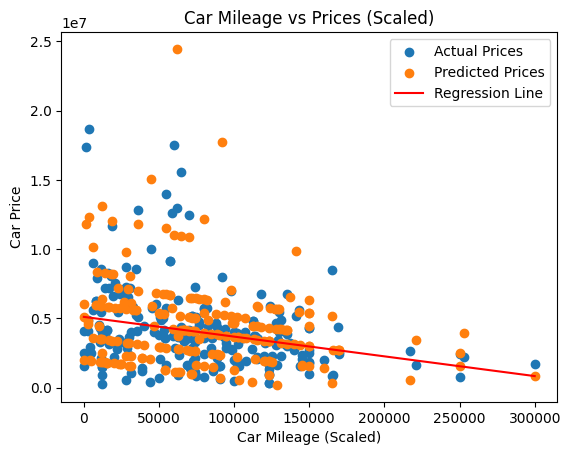

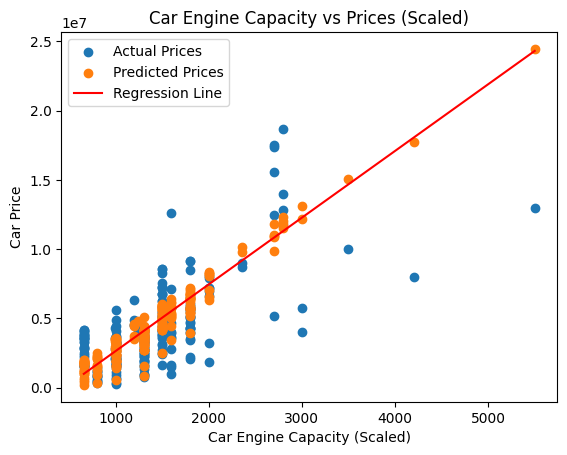

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
df_preprocessed2 = df1.copy()

X_preprocessed2 = df_preprocessed1[['Car Mileage', 'Car Engine Capacity']]
y_preprocessed2 = df_preprocessed1['Car Price']
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X_preprocessed2)
df_preprocessed2[['Car Mileage', 'Car Engine Capacity']] = X_scaled
df_preprocessed2.to_csv('dataset_with_technique_2.csv', index=False)


X_train_preprocessed2, X_test_preprocessed2, y_train_preprocessed2, y_test_preprocessed2 = train_test_split(
    X_preprocessed2, y_preprocessed2, test_size=0.2, random_state=42)

model_preprocessed2 = LinearRegression()
model_preprocessed2.fit(X_train_preprocessed2, y_train_preprocessed2)
y_pred_preprocessed2 = model_preprocessed2.predict(X_test_preprocessed2)

mse = mean_squared_error(y_test_preprocessed2, y_pred_preprocessed2)
r2 = r2_score(y_test_preprocessed2, y_pred_preprocessed2)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model.predict([[500, 2000]])
print("Predicted price for mileage 20,000 and engine capacity 1500:",int(predicted_price))

plt.scatter(X_test_preprocessed2['Car Mileage'], y_test_preprocessed2, label='Actual Prices')
plt.scatter(X_test_preprocessed2['Car Mileage'], y_pred_preprocessed2, label='Predicted Prices')
plt.xlabel("Car Mileage (Scaled)")
plt.ylabel("Car Price")
plt.title("Car Mileage vs Prices (Scaled)")

mileage_line = np.linspace(X_test_preprocessed2['Car Mileage'].min(), X_test_preprocessed2['Car Mileage'].max(), 100)
engine_capacity_line = np.median(X_test_preprocessed2['Car Engine Capacity'])
price_line = model_preprocessed2.coef_[0] * mileage_line + model_preprocessed2.coef_[1] * engine_capacity_line + model_preprocessed2.intercept_

plt.plot(mileage_line, price_line, color='red', label='Regression Line')

plt.legend()
plt.show()

plt.scatter(X_test_preprocessed2['Car Engine Capacity'], y_test_preprocessed2, label='Actual Prices')
plt.scatter(X_test_preprocessed2['Car Engine Capacity'], y_pred_preprocessed2, label='Predicted Prices')
plt.xlabel("Car Engine Capacity (Scaled)")
plt.ylabel("Car Price")
plt.title("Car Engine Capacity vs Prices (Scaled)")

mileage_line = np.median(X_test_preprocessed2['Car Mileage'])
engine_capacity_line = np.linspace(X_test_preprocessed2['Car Engine Capacity'].min(), X_test_preprocessed2['Car Engine Capacity'].max(), 100)
price_line = model_preprocessed2.coef_[0] * mileage_line + model_preprocessed2.coef_[1] * engine_capacity_line + model_preprocessed2.intercept_

plt.plot(engine_capacity_line, price_line, color='red', label='Regression Line')

plt.legend()
plt.show()



Mean Squared Error: 8597749855310.231
R^2 Score: 0.07781145059471639
Predicted price for mileage 20,000: -15564162985


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


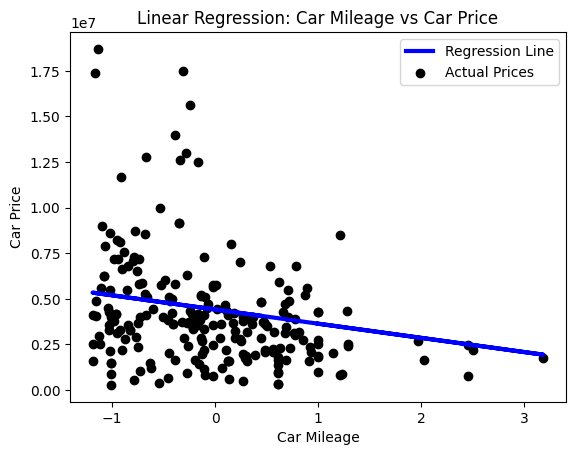

In [36]:
#from sklearn.preprocessing import StandardScaler, OneHotEncoder

#df_preprocessed2 = df1.copy()

X_preprocessed2 = df_preprocessed2[['Car Mileage']]
y_preprocessed2 = df_preprocessed2['Car Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed2)
df_preprocessed2[['Car Mileage']] = X_scaled
#df_preprocessed2.to_csv('dataset_with_technique_2.csv', index=False)

X_train_preprocessed2, X_test_preprocessed2, y_train_preprocessed2, y_test_preprocessed2 = train_test_split(
    X_preprocessed2, y_preprocessed2, test_size=0.2, random_state=42)

model_preprocessed2 = LinearRegression()
model_preprocessed2.fit(X_train_preprocessed2, y_train_preprocessed2)
y_pred_preprocessed2 = model_preprocessed2.predict(X_test_preprocessed2)

mse = mean_squared_error(y_test_preprocessed2, y_pred_preprocessed2)
r2 = r2_score(y_test_preprocessed2, y_pred_preprocessed2)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model_preprocessed2.predict([[20000]])
print("Predicted price for mileage 20,000:", int(predicted_price))

# Plotting
plt.plot(X_test_preprocessed2, y_pred_preprocessed2, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_test_preprocessed2, y_test_preprocessed2, color='black', label='Actual Prices')
plt.xlabel('Car Mileage')
plt.ylabel('Car Price')
plt.title('Linear Regression: Car Mileage vs Car Price')
plt.legend()
plt.show()


Mean Squared Error: 5702856431279.918
R^2 Score: 0.3883156653388288
Predicted price for Car Engine Capacity 1500 CC: 4673525529


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


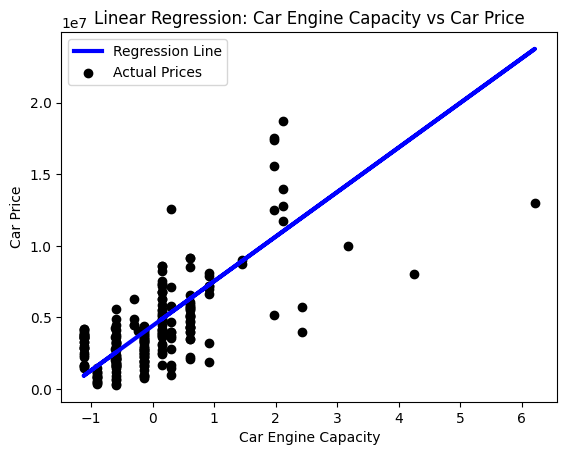

In [37]:
#from sklearn.preprocessing import StandardScaler, OneHotEncoder

#df_preprocessed2 = df1.copy()

X_preprocessed2 = df_preprocessed2[['Car Engine Capacity']]
y_preprocessed2 = df_preprocessed2['Car Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed2)
df_preprocessed2[['Car Engine Capacity']] = X_scaled
#df_preprocessed2.to_csv('dataset_with_technique_2.csv', index=False)

X_train_preprocessed2, X_test_preprocessed2, y_train_preprocessed2, y_test_preprocessed2 = train_test_split(
    X_preprocessed2, y_preprocessed2, test_size=0.2, random_state=42)

model_preprocessed2 = LinearRegression()
model_preprocessed2.fit(X_train_preprocessed2, y_train_preprocessed2)
y_pred_preprocessed2 = model_preprocessed2.predict(X_test_preprocessed2)

mse = mean_squared_error(y_test_preprocessed2, y_pred_preprocessed2)
r2 = r2_score(y_test_preprocessed2, y_pred_preprocessed2)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model_preprocessed2.predict([[1500]])
print("Predicted price for Car Engine Capacity 1500 CC:", int(predicted_price))

# Plotting
plt.plot(X_test_preprocessed2, y_pred_preprocessed2, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_test_preprocessed2, y_test_preprocessed2, color='black', label='Actual Prices')
plt.xlabel('Car Engine Capacity')
plt.ylabel('Car Price')
plt.title('Linear Regression: Car Engine Capacity vs Car Price')
plt.legend()
plt.show()


In [38]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [39]:
outliers = find_outliers_IQR(df["Car Price"])
print("number of outliers in Car Price column: "+ str(len(outliers)))
outliers = find_outliers_IQR(df["Car Mileage"])
print("number of outliers in Car Mileage column: "+ str(len(outliers)))
outliers = find_outliers_IQR(df["Car Engine Capacity"])
print("number of outliers in Car Engine Capacity column: "+ str(len(outliers)))

number of outliers in Car Price column: 68
number of outliers in Car Mileage column: 25
number of outliers in Car Engine Capacity column: 73


In [40]:
def remove_outliers_IQR(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1


    df_no_outliers = df[~((df[column_name] < (q1 - 1.5 * IQR)) | (df[column_name] > (q3 + 1.5 * IQR)))]

    return df_no_outliers

df_no_outliers_price = remove_outliers_IQR(df, "Car Price")
print("Number of rows after removing outliers in Car Price column: " + str(len(df_no_outliers_price)))

df_no_outliers_mileage = remove_outliers_IQR(df, "Car Mileage")
print("Number of rows after removing outliers in Car Mileage column: " + str(len(df_no_outliers_mileage)))

df_no_outliers_capacity = remove_outliers_IQR(df, "Car Engine Capacity")
print("Number of rows after removing outliers in Car Engine Capacity column: " + str(len(df_no_outliers_capacity)))


Number of rows after removing outliers in Car Price column: 1053
Number of rows after removing outliers in Car Mileage column: 1096
Number of rows after removing outliers in Car Engine Capacity column: 1048


In [41]:
df2 = pd.read_csv('/content/selected_features_backward.csv')

Mean Squared Error: 8597749855310.231
R^2 Score: 0.07781145059471639
Predicted price for mileage 20,000: 5114117


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


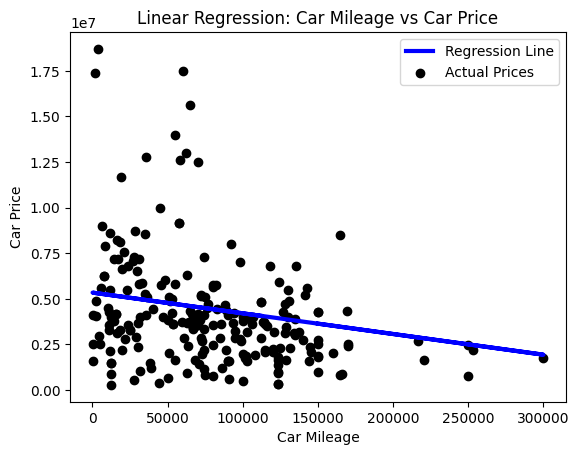

In [42]:
df_preprocessed1 = df2.copy()
df_preprocessed1['Car Mileage'] = df_preprocessed1['Car Mileage'].fillna(df_preprocessed1['Car Mileage'].mean())

X_preprocessed1 = df_preprocessed1[['Car Mileage']]
y_preprocessed1 = df_preprocessed1['Car Price']

X_train_preprocessed1, X_test_preprocessed1, y_train_preprocessed1, y_test_preprocessed1 = train_test_split(
    X_preprocessed1, y_preprocessed1, test_size=0.2, random_state=42)

model_preprocessed1 = LinearRegression()
model_preprocessed1.fit(X_train_preprocessed1, y_train_preprocessed1)
y_pred_preprocessed1 = model_preprocessed1.predict(X_test_preprocessed1)

mse = mean_squared_error(y_test_preprocessed1, y_pred_preprocessed1)
r2 = r2_score(y_test_preprocessed1, y_pred_preprocessed1)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model_preprocessed1.predict([[20000]])
print("Predicted price for mileage 20,000:", int(predicted_price))

plt.plot(X_test_preprocessed1, y_pred_preprocessed1, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_test_preprocessed1, y_test_preprocessed1, color='black', label='Actual Prices')
plt.xlabel('Car Mileage')
plt.ylabel('Car Price')
plt.title('Linear Regression: Car Mileage vs Car Price')
plt.legend()
plt.show()


In [43]:
df3 = pd.read_csv('/content/selected_features_variance.csv')

Mean Squared Error: 7936385040073.397
R^2 Score: 0.1487489714408543
Predicted price for model 2013: 4020175


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


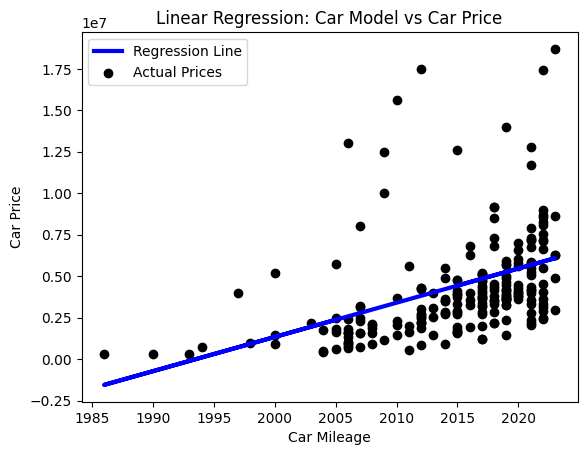

In [44]:
df_preprocessed1 = df3.copy()
df_preprocessed1['Car Model'] = df_preprocessed1['Car Model'].fillna(df_preprocessed1['Car Model'].mean())

X_preprocessed1 = df_preprocessed1[['Car Model']]
y_preprocessed1 = df_preprocessed1['Car Price']

X_train_preprocessed1, X_test_preprocessed1, y_train_preprocessed1, y_test_preprocessed1 = train_test_split(
    X_preprocessed1, y_preprocessed1, test_size=0.2, random_state=42)

model_preprocessed1 = LinearRegression()
model_preprocessed1.fit(X_train_preprocessed1, y_train_preprocessed1)
y_pred_preprocessed1 = model_preprocessed1.predict(X_test_preprocessed1)

mse = mean_squared_error(y_test_preprocessed1, y_pred_preprocessed1)
r2 = r2_score(y_test_preprocessed1, y_pred_preprocessed1)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predicted_price = model_preprocessed1.predict([[2013]])
print("Predicted price for model 2013:", int(predicted_price))

plt.plot(X_test_preprocessed1, y_pred_preprocessed1, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_test_preprocessed1, y_test_preprocessed1, color='black', label='Actual Prices')
plt.xlabel('Car Mileage')
plt.ylabel('Car Price')
plt.title('Linear Regression: Car Model vs Car Price')
plt.legend()
plt.show()


**Deep learning model on minimal preprocessing**

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df1 = pd.read_csv('/content/dataset_with_minimalpreprocessing.csv')

df1 = pd.get_dummies(df1, drop_first=True)

X = df1.drop('Car Price', axis=1)
y = df1['Car Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred = model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred)
r2_dl = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Deep Learning Model: {mse_dl}")
print(f"R-squared on Deep Learning Model: {r2_dl}")


Epoch 1/50
28/28 [==============================] - 2s 23ms/step - loss: 40490279895040.0000 - val_loss: 26984690221056.0000
Epoch 2/50
28/28 [==============================] - 0s 12ms/step - loss: 40490011459584.0000 - val_loss: 26984165933056.0000
Epoch 3/50
28/28 [==============================] - 0s 12ms/step - loss: 40489164210176.0000 - val_loss: 26982584680448.0000
Epoch 4/50
28/28 [==============================] - 0s 12ms/step - loss: 40486966394880.0000 - val_loss: 26979080339456.0000
Epoch 5/50
28/28 [==============================] - 0s 12ms/step - loss: 40482436546560.0000 - val_loss: 26972520448000.0000
Epoch 6/50
28/28 [==============================] - 0s 12ms/step - loss: 40474677084160.0000 - val_loss: 26961608966144.0000
Epoch 7/50
28/28 [==============================] - 0s 12ms/step - loss: 40462446493696.0000 - val_loss: 26945347649536.0000
Epoch 8/50
28/28 [==============================] - 0s 11ms/step - loss: 40444788473856.0000 - val_loss: 26922885054464.0000


In [46]:
import plotly.express as px

viz_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.reshape(-1)})

fig = px.scatter(viz_df, x='Actual', y='Predicted', title='Actual vs. Predicted Values')
fig.show()


**Deep learning model on preprocessing technique1**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df1 = pd.read_csv('/content/dataset_with_technique_1.csv')

df1 = pd.get_dummies(df1, drop_first=True)


X = df1.drop('Car Price', axis=1)
y = df1['Car Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred = model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred)
r2_dl = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Deep Learning Model: {mse_dl}")
print(f"R-squared on Deep Learning Model: {r2_dl}")


Epoch 1/50
28/28 [==============================] - 1s 11ms/step - loss: 40490263117824.0000 - val_loss: 26984644083712.0000
Epoch 2/50
28/28 [==============================] - 0s 7ms/step - loss: 40489935962112.0000 - val_loss: 26983962509312.0000
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 40488816082944.0000 - val_loss: 26982005866496.0000
Epoch 4/50
28/28 [==============================] - 0s 7ms/step - loss: 40486081396736.0000 - val_loss: 26977627013120.0000
Epoch 5/50
28/28 [==============================] - 0s 7ms/step - loss: 40480612024320.0000 - val_loss: 26969626378240.0000
Epoch 6/50
28/28 [==============================] - 0s 7ms/step - loss: 40471032233984.0000 - val_loss: 26956772933632.0000
Epoch 7/50
28/28 [==============================] - 0s 6ms/step - loss: 40456545107968.0000 - val_loss: 26937693044736.0000
Epoch 8/50
28/28 [==============================] - 0s 7ms/step - loss: 40435871383552.0000 - val_loss: 26912176996352.0000
Epoch 9

In [48]:
import plotly.express as px

viz_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.reshape(-1)})
fig = px.scatter(viz_df, x='Actual', y='Predicted', title='Actual vs. Predicted Values')
fig.show()


**Deep learning model on preprocessing technique 2**

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df1 = pd.read_csv('/content/dataset_with_technique_2.csv')


df1 = pd.get_dummies(df1, drop_first=True)


X = df1.drop('Car Price', axis=1)
y = df1['Car Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred = model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred)
r2_dl = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Deep Learning Model: {mse_dl}")
print(f"R-squared on Deep Learning Model: {r2_dl}")


Epoch 1/50
28/28 [==============================] - 1s 11ms/step - loss: 40490275700736.0000 - val_loss: 26984671346688.0000
Epoch 2/50
28/28 [==============================] - 0s 7ms/step - loss: 40489952739328.0000 - val_loss: 26983987675136.0000
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 40488778334208.0000 - val_loss: 26981886328832.0000
Epoch 4/50
28/28 [==============================] - 0s 7ms/step - loss: 40485817155584.0000 - val_loss: 26977236942848.0000
Epoch 5/50
28/28 [==============================] - 0s 7ms/step - loss: 40480138067968.0000 - val_loss: 26968898666496.0000
Epoch 6/50
28/28 [==============================] - 0s 7ms/step - loss: 40470407282688.0000 - val_loss: 26955577556992.0000
Epoch 7/50
28/28 [==============================] - 0s 7ms/step - loss: 40455450394624.0000 - val_loss: 26936275369984.0000
Epoch 8/50
28/28 [==============================] - 0s 6ms/step - loss: 40434332073984.0000 - val_loss: 26909316481024.0000
Epoch 9

In [50]:
import plotly.express as px

viz_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.reshape(-1)})
fig = px.scatter(viz_df, x='Actual', y='Predicted', title='Actual vs. Predicted Values')
fig.show()


**Deep learning model on feature selection technique 1**

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df1 = pd.read_csv('/content/selected_features_backward.csv')


df1 = pd.get_dummies(df1, drop_first=True)


X = df1.drop('Car Price', axis=1)
y = df1['Car Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred = model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred)
r2_dl = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Deep Learning Model: {mse_dl}")
print(f"R-squared on Deep Learning Model: {r2_dl}")


Epoch 1/50
28/28 [==============================] - 1s 9ms/step - loss: 40490313449472.0000 - val_loss: 26984811855872.0000
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 40490296672256.0000 - val_loss: 26984784592896.0000
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 40490258923520.0000 - val_loss: 26984721678336.0000
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 40490154065920.0000 - val_loss: 26984576974848.0000
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 40489940156416.0000 - val_loss: 26984323219456.0000
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 40489596223488.0000 - val_loss: 26983912177664.0000
Epoch 7/50
28/28 [==============================] - 0s 4ms/step - loss: 40489067741184.0000 - val_loss: 26983289323520.0000
Epoch 8/50
28/28 [==============================] - 0s 3ms/step - loss: 40488279212032.0000 - val_loss: 26982446268416.0000
Epoch 9/

In [52]:
import plotly.express as px

viz_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.reshape(-1)})

fig = px.scatter(viz_df, x='Actual', y='Predicted', title='Actual vs. Predicted Values')
fig.show()


**Deep learning model on feature selection technique 2**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
df1 = pd.read_csv('/content/selected_features_variance.csv')

df1 = pd.get_dummies(df1, drop_first=True)

X = df1.drop('Car Price', axis=1)
y = df1['Car Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred = model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred)
r2_dl = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Deep Learning Model: {mse_dl}")
print(f"R-squared on Deep Learning Model: {r2_dl}")


Epoch 1/50
28/28 [==============================] - 1s 8ms/step - loss: 40490326032384.0000 - val_loss: 26984828633088.0000
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 40490326032384.0000 - val_loss: 26984824438784.0000
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 40490326032384.0000 - val_loss: 26984824438784.0000
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 40490326032384.0000 - val_loss: 26984824438784.0000
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 40490313449472.0000 - val_loss: 26984824438784.0000
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 40490326032384.0000 - val_loss: 26984824438784.0000
Epoch 7/50
28/28 [==============================] - 0s 4ms/step - loss: 40490326032384.0000 - val_loss: 26984818147328.0000
Epoch 8/50
28/28 [==============================] - 0s 3ms/step - loss: 40490326032384.0000 - val_loss: 26984818147328.0000
Epoch 9/

In [54]:
import plotly.express as px


viz_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.reshape(-1)})


fig = px.scatter(viz_df, x='Actual', y='Predicted', title='Actual vs. Predicted Values')
fig.show()


In [55]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('/content/dataset_with_minimalpreprocessing.csv')

X = df1[['Car Model', 'Car Mileage']]
y = df1['Car Price']


model = LinearRegression()


num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')


mse_scores = -cross_val_scores


for i, mse in enumerate(mse_scores):
    print(f'Fold {i + 1}: Mean Squared Error = {mse}')


print(f'Average Mean Squared Error across {num_folds} folds: {mse_scores.mean()}')


Fold 1: Mean Squared Error = 14711109962351.754
Fold 2: Mean Squared Error = 10373226094020.445
Fold 3: Mean Squared Error = 25873688141428.43
Average Mean Squared Error across 3 folds: 16986008065933.541


In [56]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('/content/dataset_with_technique_1.csv')

X = df1[['Car Model', 'Car Mileage']]
y = df1['Car Price']

model = LinearRegression()

num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')


mse_scores = -cross_val_scores


for i, mse in enumerate(mse_scores):
    print(f'Fold {i + 1}: Mean Squared Error = {mse}')


print(f'Average Mean Squared Error across {num_folds} folds: {mse_scores.mean()}')


Fold 1: Mean Squared Error = 14711109962351.754
Fold 2: Mean Squared Error = 10373226094020.445
Fold 3: Mean Squared Error = 25873688141428.43
Average Mean Squared Error across 3 folds: 16986008065933.541


In [57]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('/content/dataset_with_technique_2.csv')

X = df1[['Car Model', 'Car Mileage']]
y = df1['Car Price']


model = LinearRegression()


num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')


mse_scores = -cross_val_scores


for i, mse in enumerate(mse_scores):
    print(f'Fold {i + 1}: Mean Squared Error = {mse}')


print(f'Average Mean Squared Error across {num_folds} folds: {mse_scores.mean()}')


Fold 1: Mean Squared Error = 14711109962351.766
Fold 2: Mean Squared Error = 10373226094020.447
Fold 3: Mean Squared Error = 25873688141428.44
Average Mean Squared Error across 3 folds: 16986008065933.553


In [58]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('/content/selected_features_backward.csv')

X = df1[['Car Model', 'Car Mileage']]
y = df1['Car Price']

model = LinearRegression()


num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')


mse_scores = -cross_val_scores


for i, mse in enumerate(mse_scores):
    print(f'Fold {i + 1}: Mean Squared Error = {mse}')


print(f'Average Mean Squared Error across {num_folds} folds: {mse_scores.mean()}')


Fold 1: Mean Squared Error = 14711109962351.754
Fold 2: Mean Squared Error = 10373226094020.445
Fold 3: Mean Squared Error = 25873688141428.43
Average Mean Squared Error across 3 folds: 16986008065933.541


In [59]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('/content/selected_features_variance.csv')

X = df1[['Car Model']]
y = df1['Car Price']


model = LinearRegression()


num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')


mse_scores = -cross_val_scores


for i, mse in enumerate(mse_scores):
    print(f'Fold {i + 1}: Mean Squared Error = {mse}')


print(f'Average Mean Squared Error across {num_folds} folds: {mse_scores.mean()}')


Fold 1: Mean Squared Error = 14803686925349.045
Fold 2: Mean Squared Error = 10428401228743.146
Fold 3: Mean Squared Error = 25858353986845.383
Average Mean Squared Error across 3 folds: 17030147380312.525
